Next Steps:

1.) Run Light Python EDA

     Descrptive Stats

     Fraud vs non-fraud frequency

     Distributions of key variables (think premium, deductible, capital gains/loss)

     Correlation heatmap
    
     Outlier detection

2.) Move to Tableau Public 

     Visualize 4-5 of my most interesting relationships

     Build Dashboards to explain risk factors
    


In [1]:
#Lets first load the data csv file into a pandas dataframe
import pandas as pd

df = pd.read_csv('insurance_claims_cleaned.csv')

In [2]:
df.columns


Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [7]:
#Now lets do some initial descriptive statistics and visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#Lets do some initial descriptive statistics and visualizations

print(df.describe())  # default view, more concise, has numeric columns only

       months_as_customer         age  policy_number  policy_deductable  \
count          999.000000  999.000000     999.000000         999.000000   
mean           204.148148   38.967968  546568.478478        1136.136136   
std            115.006910    9.123017  256979.970712         612.155989   
min              0.000000   20.000000  100804.000000         500.000000   
25%            116.000000   32.000000  336330.500000         500.000000   
50%            200.000000   38.000000  533940.000000        1000.000000   
75%            276.500000   44.000000  759459.500000        2000.000000   
max            479.000000   64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count             999.000000    9.980000e+02     999.000000     999.000000   
mean             1256.476847    1.104208e+06  501236.887888   25151.251251   
std               244.279452    2.298480e+06   71734.023850   27874.792269   
min         

Some Initial Ideas For EDA based off the above information.

fraud target (e.g., fraud_reported / fraud) — required for all comparisons (fraud vs non‑fraud frequency, rates).


total_claim_amount / claim_amount — numeric, likely skewed and directly related to fraud/impact.


policy_annual_premium, policy_deductible — numeric financial features, check distributions and outliers.


age — demographic; distribution and relation to claim/fraud.


capital_gains, capital_loss (or similar) — numeric, often sparse/skewed; check for zeros/outliers.


incident_type, incident_severity, collision_type — low-cardinality categorical; good for grouping by fraud rate.


insured_sex, insured_education_level, policy_state — categorical demographics/location to test risk differences.


vehicle_make/model or vehicle_age — if present, useful for risk segmentation.
any date fields (incident_date, policy_bind_date) — convert to datetime and inspect recency/seasonality.

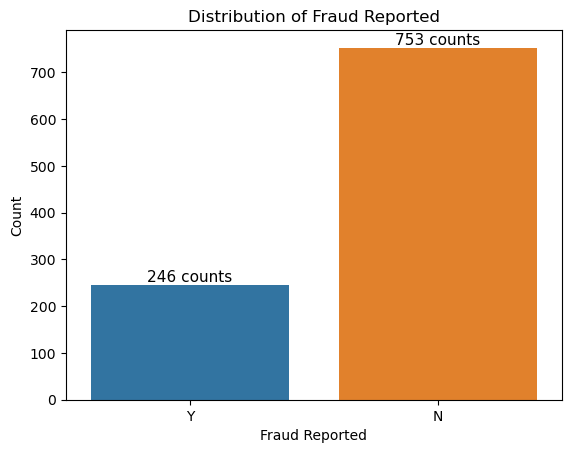

In [14]:
#Lets first take a look at the distribution of the target variable 'fraud_reported'
ax = sns.countplot (x='fraud_reported', data=df)
plt.title('Distribution of Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')

for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count} counts', (p.get_x()+p.get_width()/2., 
                             p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

As we can see, there is a total of 1000 records, 246 had fraud reported

In [15]:
#Of the 246 fraud reported cases, lets see get some descriptive statistics
fraud_cases = df[df['fraud_reported'] == 'Y']
print(fraud_cases.describe())

       months_as_customer         age  policy_number  policy_deductable  \
count          246.000000  246.000000     246.000000         246.000000   
mean           208.886179   39.223577  534315.947154        1152.439024   
std            119.396865    9.581594  256057.293069         629.329207   
min              3.000000   22.000000  104594.000000         500.000000   
25%            116.250000   32.000000  332873.250000         500.000000   
50%            200.500000   38.000000  517099.500000        1000.000000   
75%            279.000000   45.000000  737067.750000        2000.000000   
max            478.000000   63.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count             246.000000    2.460000e+02     246.000000     246.000000   
mean             1250.498293    1.341463e+06  503738.776423   24291.869919   
std               253.746441    2.498422e+06   70613.360776   27779.718320   
min         

# Fraud Cases Summary Findings

This analysis is based on **246 fraud-reported cases** from the dataset.

---

## 📊 Demographics & Policy Features
- **Age**: Mean ~39 years (range 22–63). Skews toward mid-30s–40s.
- **Months as customer**: Avg ~209 months (~17 years), but wide spread (3–478 months).  
  → Fraud occurs both early (new customers) and late (long-tenured customers).  
- **Deductibles**: Mostly $500–$2000. Median = $1000.  
- **Annual Premiums**: Median ~$1270, mean ~$1250. Range looks normal, no extreme outliers.  

---

## 💰 Financial Indicators
- **Capital Gains/Losses**: Very spread out.  
  - Mean gain ~$24K, mean loss ~$-27K.  
  - Quartiles show many zeros → extreme values are skewing averages.  
- **Umbrella Limits**: Median = 0.  
  - One extreme outlier at **$10M**. Worth checking correlation with fraud.

---

## 🚗 Claims & Incidents
- **Incident Hour**: Mean ~11:45am, evenly distributed across day (0–23 hrs).  
- **Vehicles Involved**: Median = 1, but some cases up to 4.  
- **Bodily Injuries**: Avg ~1, max = 2. Fraudsters keep injuries modest but plausible.  
- **Witnesses**: Median = 2. Possibly fabricated to add credibility.  

---

## 📑 Claims Data
- **Total Claim Amount**: Mean ~$60K, range $2.8K–$112K.  
  - Higher than typical average claims → fraud clusters around **large but not extreme claims**.  
- **Breakdown**:
  - Injury claims: Avg ~$8.2K
  - Property claims: Avg ~$8.6K
  - Vehicle claims: Avg ~$43.5K  
  → Vehicle damage dominates total payout.

---

## 🚘 Auto Features
- **Auto Year**: Mean ~2005, range 1995–2015.  
  → Fraud tends to involve **mid-age cars**, not brand new or very old ones.

---

## ✅ Next Steps
1. Compare **fraud vs. non-fraud groups** → look for feature deltas.  
2. Visualize distributions:
   - Boxplots for premiums, claim amounts, auto year.  
   - Histograms of incident hour and age.  
3. Explore categorical features (occupation, education, state, etc.) for fraud enrichment.  
4. Build predictive features (e.g., high claim-to-premium ratio, umbrella = 0 vs large values).  

---


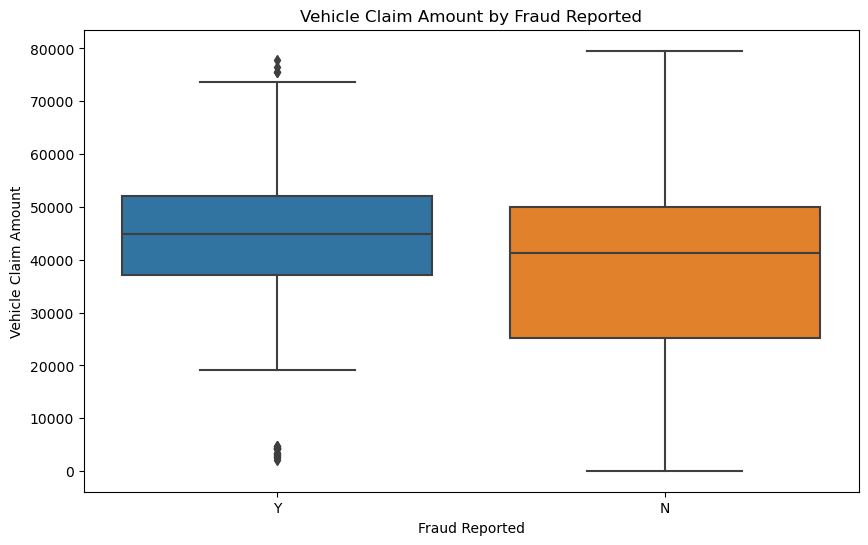

In [ ]:
#Lets compare fraud to non-fraud cases for first, the variable 'vehicle_claim'
plt.figure(figsize=(10,6))
sns.boxplot(x='fraud_reported', y='vehicle_claim', data=df)
plt.title('Vehicle Claim Amount by Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Vehicle Claim Amount')
plt.show()

Interestingly, for spread: Fraud cases are more tightly clustered around mid-claims (30K–55K), while non-fraud spans a much wider range.

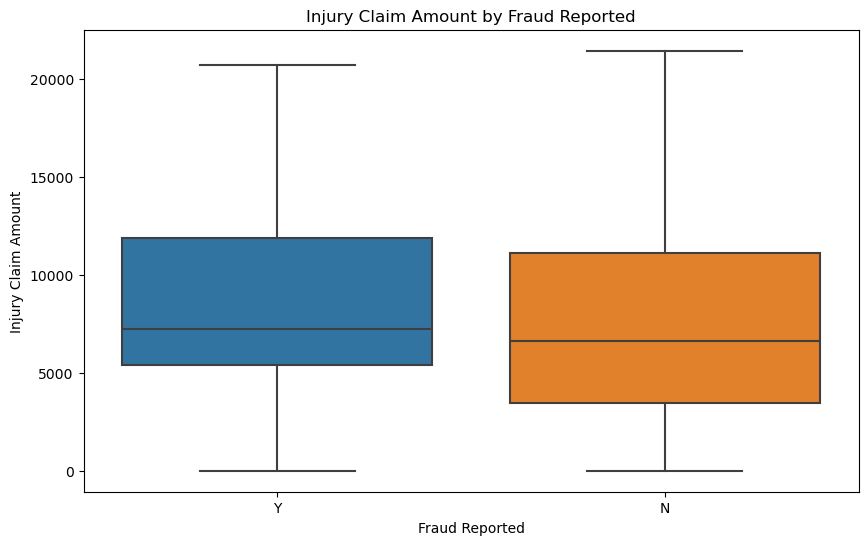

In [20]:
#Lets take a look at fraud vs non-fraud for injury_claim
plt.figure(figsize = (10,6))
sns.boxplot(x= 'fraud_reported', y='injury_claim', data=df)
plt.title('Injury Claim Amount by Fraud Reported')
plt.xlabel ('Fraud Reported')
plt.ylabel ('Injury Claim Amount')
plt.show()

Just like with vehicle claims, fraudsters aim for moderately high, not extreme, amounts → enough to get paid but not so much it looks suspicious.

Injury claims in fraud cases rarely drop to the very small payouts that you see in genuine claims.